/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


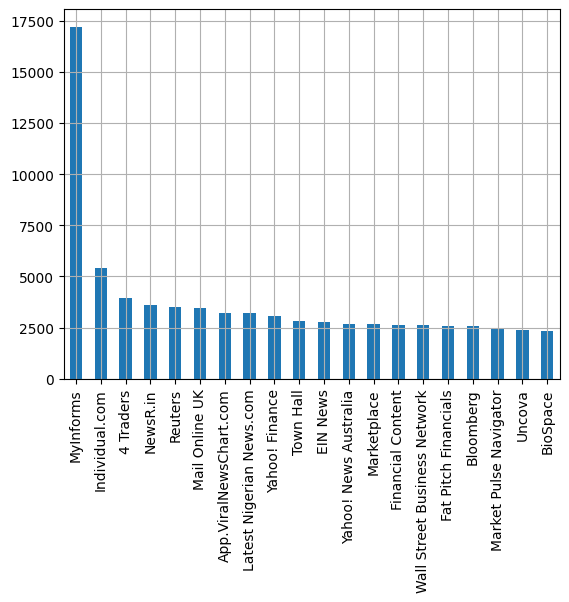

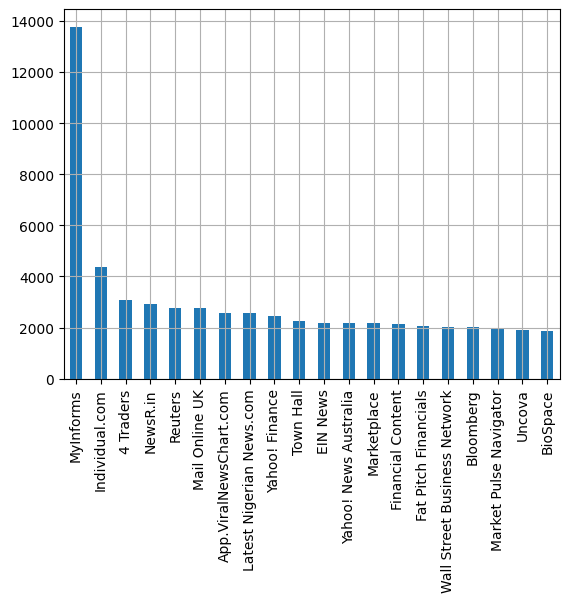

In [1]:
import pandas as pd 
import nltk
import torch
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn import metrics, preprocessing
import torchtext
import os
import collections
from torch import nn
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import torch.nn.functional as Fun
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.corpus import stopwords
import string
import re
import warnings
from sklearn import preprocessing


warnings.filterwarnings('ignore')
#data = pd.read_csv("data/fraction_of_data.csv")
data = pd.read_csv("data/signal_20_obligatory1_train.tsv", sep = "\t")



random_state = 42

x = data.text
y = data.source

x_train, x_val, y_train, y_val = train_test_split(x,
                                                  y,
                                                  test_size = 0.2,
                                                  random_state = random_state,
                                                  #stratify = y
                                                  )

data.source.value_counts().plot(kind='bar')
plt.grid()
plt.show()

y_train.value_counts().plot(kind = 'bar')
plt.grid()
plt.show()

In [2]:
data.source.value_counts()

MyInforms                       17210
Individual.com                   5416
4 Traders                        3959
NewsR.in                         3600
Reuters                          3496
Mail Online UK                   3439
App.ViralNewsChart.com           3219
Latest Nigerian News.com         3206
Yahoo! Finance                   3067
Town Hall                        2842
EIN News                         2774
Yahoo! News Australia            2694
Marketplace                      2679
Financial Content                2646
Wall Street Business Network     2605
Fat Pitch Financials             2582
Bloomberg                        2554
Market Pulse Navigator           2449
Uncova                           2378
BioSpace                         2326
Name: source, dtype: int64

In [3]:
# words that previously ended up in the vocabulary that we dont want to use

stopwords = ["sep", "be", "min", "say", "in", "hel", "co", "de", "la",
             "th", "cut", "much", "www", "com", "tsx", "asa", "49", "have",
             "far", "same", "pv", "us", "all", "well", "42", "own", "name",
             "many", "still", "click", "here", "read", "news", "even", "world",
             "we", "on", "day", "now", "only", "run", "big", "how", "go", "to",
             "like", "comment", "search", "man", "Texa", "sept", "29", "prnewswire",
             "new", "use", "two", "just", "next", "step", "make", "easy", "get",
             "need", "set", "oem", "marie", "smith", "pr", "end", "June",
             "re", "per", "10", "fix", "clos", "lay", "mill", "such", "non",
             "promot", "ed", "ph", "put", "for", "1st", "ky", "cumberland",
             "list", "arixona", "phoenix", "chigaco", "illinois", "idaho",
             "boston", "massachusett", "city", "seattle", "washington", "omaha",
             "nebraska", "chicago", "oregon", "philadelphia", "pennsylvania",
             "johnson", "tennesse","tennessee", "george", "fox", "indiana", "mercy", "virginia",
             "nashville", "michigan", "nortwest", "sam", "houston", "alabama",
             "florida", "cincinnati", "ohio", "florida", "minnesota", "minneapolis",
             "lincoln", "enland", "maine", "carolina", "los", "angele", "georgia",
             "see", "site", "about", "sacramento", "putt", "band", "back", "gm",
             "too", "foot", "bit", "as", "cas", "suight", "ad", "till", "richard",
             "m2", "ga", "ga", "az", "do", "zack", "michael", "connecticut", "york",
             "kenneth", "show", "203", "christina", "09", "24", "Roy", "of",
             "colorado", "chicago", "arizona", "michel", "montreal", "quebec", "mario",
             "james", "tsx", "sub", "gmbh", "ebitda", "old", "new", "tri", "steve", "arizona",
             "chicago", "tennessee", "george", "sam", "columbia", "california", "tampa",
             "way", "abnewswire", "stamford", "04", "21", "22", "15", "25", "4k", "___", 
             "nv", "gam", "upcom", "expo", "combin", "john", "up", "xml", "json", "at", "san",
             "jose", "kumar", "rt", "di", "jr", "ko", "pac", "andre", "mgm", "nevada", "et",
              "vow", "then", "ali", "spr", "four", "fla", "17th", "st", "10th", "fda", "nda",
              "tim", "describ", "brian", "david", "matt", "or", "caqr", "acte", "bas", "llc",
              "ge", "jordan", "11", "vancouver", "toronto", "issu", "undue", "la_propn", "nv_propn",
             "vega_propn", "gam_verb", "combin_verb", "john_propn", "excit_adj", "tailore_verb",
             "set_verb", "s_verb", "gam_adj", "com_noun", "xml_propn", "json_propn", "at_adv",
             "jose_noun", "san_propn", "california_propn", "kumar_propn", "rt_propn", "up_adv",
             "set_noun", "go_verb", "be_verb", "here_adv", "get_propn", "nevada_propn", "v_noun",
             "tv_noun", "et_propn", "george_propn", "jack_propn", "put_verb", "then_adv", "vow_verb",
             "s_propn", "ali_propn", "spr_verb", "get_verb", "just_adv", "29_adj", "all_adv", "fla_propn",
             "j_propn", "d_propn", "st_noun", "top", "fda_propn", "also_adv", "_sym", "fda_noun", "tim_noun",
             "appro_verb", "determin_verb", "k_propn", "d_verb", "matt_propn", "brian_propn", "david_propn",
             "llc_propn", "k_noun", "james_propn", "jordan_propn"]


In [4]:

def preprocessing_step(text):
    text = re.sub(r'[\w.,]*[\w.,]*_NUM\S*', ' ', text)
    text = re.sub(r'[^\w]', ' ', text)
    text = re.sub("^\d+\s|\s\d+\s|\s\d+$", " ", text)
    text = text.lower()
    
    querywords = text.split()
    resultwords  = [word for word in querywords if word not in stopwords]
    text = ' '.join(resultwords)

    return text

vectorizer_train = TfidfVectorizer(dtype = np.float32,
                                   ngram_range=(1,2),
                                   preprocessor = preprocessing_step,
                                   max_features = 10000,
                                  )

x_train = vectorizer_train.fit_transform(x_train)

vocab = vectorizer_train.vocabulary_





In [5]:
len(vocab)

10000

In [6]:
vocab

{'arena_propn': 558,
 'world_noun': 9884,
 'booth_noun': 1010,
 'marketwired_verb': 5371,
 'september_propn': 8069,
 'launch_verb': 4885,
 'revolutionary_adj': 7643,
 'new_adj': 5864,
 'pulse_noun': 7097,
 '_noun': 67,
 'upcom_adj': 9427,
 'global_adj': 3708,
 'expo_propn': 3090,
 'first_adj': 3364,
 'hybrid_adj': 4210,
 'experience_noun': 3069,
 'comprise_verb': 1791,
 'game_verb': 3633,
 'social_adj': 8329,
 'atmosphere_noun': 661,
 'design_verb': 2361,
 'only_adv': 6147,
 'attract_verb': 678,
 'next_adj': 5934,
 'generation_noun': 3672,
 'player_noun': 6616,
 'exist_adj': 3050,
 'seek_verb': 7994,
 'innovation_noun': 4454,
 'luxury_noun': 5178,
 'electronic_adj': 2765,
 'machine_noun': 5191,
 'immersive_adj': 4251,
 'visual_adj': 9621,
 'entertainment_noun': 2886,
 'product_noun': 6934,
 'provide_verb': 7036,
 'strategic_adj': 8642,
 'approach_noun': 534,
 'target_noun': 8920,
 'patent_adj': 6403,
 'multi': 5736,
 'game_adj': 3631,
 'live_adj': 5067,
 'dealer_noun': 2229,
 'selectio

In [7]:
x_train = x_train.toarray()  

x_val = vectorizer_train.transform(x_val)
x_val = x_val.toarray()  

x_train, x_val = torch.from_numpy(x_train), torch.from_numpy(x_val)


label_dict =  preprocessing.LabelEncoder()
label_dict.fit(y_train)
y_train = label_dict.transform(y_train)
y_val = label_dict.transform(y_val)
y_train = torch.tensor(y_train)
y_val = torch.tensor(y_val)
num_classes = len(label_dict.classes_)

In [9]:

class generator(torch.utils.data.Dataset):
    def __init__(self, inputs, labels):
        self.inputs = inputs
        self.labels = labels
        
    def __getitem__(self, index):
        x = self.inputs[index]
        y = self.labels[index]
        y = torch.tensor(y, dtype=torch.long)
        return x, y
    
    def __len__(self):
        return len(self.inputs)
    
    
train_dataset = generator(x_train, y_train)
val_dataset = generator(x_val, y_val)

In [10]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        
class FeedForwardNN(nn.Module):
    def __init__(self, input_size, hidden_size, hidden_layers, num_classes):
        super().__init__()
        self.hidden_layers = nn.ModuleList([nn.Linear(input_size, hidden_size)])
        for i in range (hidden_layers-1):
            self.hidden_layers.append(nn.Linear(hidden_size, hidden_size))
        self.output_layer = nn.Linear(hidden_size, num_classes)
        self.gelu = nn.GELU()
        
    def forward(self, out):
        for layer in self.hidden_layers:
            out = self.gelu(layer(out))
        out = self.output_layer(out)
        return out

In [11]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

def accuracy(y_pred, y_true):
    correct = y_true.long()
    pred = y_pred.long().squeeze(-1)
    print(correct.shape, pred.shape)
    return (correct == pred).float.mean() * 100.0

@torch.no_grad()
def evaluate(classifier, dataloader):
    avg_loss = 0.0
    avg_acc = 0.0
    for inputs, targets in dataloader:
        predictions = classifier(inputs)
        loss = loss_fn(predictions, targets)
        avg_loss += loss.item()
        acc = accuracy(predictions, targets)
        avg_acc +=  acc

    return avg_loss / len(dataloader), avg_acc / len(dataloader)

In [12]:
torch.manual_seed(42)

def train(train_dataset, val_dataset, model, batch_size: int, n_epochs: int, lr: float, info = True):
    
    optimizer = torch.optim.AdamW(model.parameters(),
                                  lr = lr,
                                  #betas = (0.9, 0.999),
                                  #eps = 1e-08,
                                  #weight_decay = 0.0
                                 )
    
    train_dataloader = torch.utils.data.DataLoader(train_dataset,
                                                   batch_size = batch_size,
                                                   shuffle = True,
                                                   num_workers = 0)

    val_dataloader = torch.utils.data.DataLoader(val_dataset,
                                                 batch_size = batch_size,
                                                 shuffle = True,
                                                 num_workers = 0)
    
    n_total_steps = len(train_dataloader)
    
    for epoch in range(n_epochs):
        
        if info:
            print("\n")
            print("==========================")
            print(f"Run: {epoch + 1} / {n_epochs}:")
        
        correct = 0
        n_samples = 0
        val_correct = 0 
        val_samples = 0
        
        for i, (inputs, labels) in enumerate(train_dataloader):
            
            x_train = inputs.to(device)
            y_train = labels.to(device)
            
            #### training
            model.train()

            # 1. forward pass
            y_pred = model(x_train)

            # 2. calculate loss and accuracy
            loss = loss_fn(y_pred, y_train)
            
            predictions = torch.argmax(y_pred, 1)
            acc = accuracy_fn(y_train, predictions)
            
            # 3. optimizer
            optimizer.zero_grad()

            # 4. loss backwards
            loss.backward()

            # 5. optimizer step
            optimizer.step()
            
            correct += (predictions == y_train).float().sum()
            n_samples += y_train.shape[0]
            
            if i % 10 == 0 and info:
                print(f"step {i + 1} / {n_total_steps}: loss = {loss:.3f}, train acc = {acc}%")
            
        
        with torch.no_grad():
            if info:
                print("--------------")
                print("Validation:")
            
            
            for i, (inputs, labels) in enumerate(val_dataloader):

                x_val = inputs.to(device)
                y_val = labels.to(device)

                #### testing
                model.eval()
                # 1. forward pass
                test_pred = model(x_val)

                # 2. loss & acc
                test_loss = loss_fn(test_pred, y_val)

                test_predictions = torch.argmax(test_pred, 1)
                test_acc = accuracy_fn(y_val, test_predictions)
                
                val_correct += (test_predictions == y_val).float().sum()
                val_samples += y_val.shape[0]
                
                if i % 10 == 0 and info:
                    print(f"step {i + 1} / {n_total_steps}: val loss = {test_loss:.3f}, val acc = {test_acc}%")

        #if (epoch * 10) % n_epochs == 0 and info:
        if True:
            acc = 100 * correct / n_samples
            test_acc = 100 * val_correct / val_samples

            print(f"run: {epoch}\nacc = {acc:.3f}%\n")
            print(f"test acc = {test_acc:.3f}%\n\n")
    
    return model

In [13]:
model = FeedForwardNN(input_size = len(vectorizer_train.get_feature_names_out()),
                      hidden_size = 100,
                      hidden_layers = 1,
                      num_classes = num_classes
                     ).to(device)

loss_fn = nn.CrossEntropyLoss()

trained_model = train(train_dataset,
                      val_dataset,
                      model,
                      batch_size = 64,
                      n_epochs = 50,
                      lr = 0.0001,
                      info = False)

pred = trained_model(x_train)
_, predictions = torch.max(pred, 1)

accuracy = torch.eq(predictions, y_train).sum().item() / len(y_train) * 100
print(f"Accuracy: {accuracy:.3f}%")

val_pred = trained_model(x_val)
_, val_predictions = torch.max(val_pred, 1)

val_accuracy = torch.eq(val_predictions, y_val).sum().item() / len(y_val) * 100
print(f"Val accuracy: {val_accuracy:.3f}%")

y_pred = trained_model(x_val)
_, predictions = torch.max(y_pred, 1)
y_truth = y_val
f1 = metrics.f1_score(predictions, y_truth, average = "macro")
print(f"F1 scoree: {100* f1:.2f}%")



run: 0
acc = 27.284%

test acc = 28.724%


run: 1
acc = 32.017%

test acc = 33.835%


run: 2
acc = 36.873%

test acc = 38.951%


run: 3
acc = 42.594%

test acc = 43.383%


run: 4
acc = 46.914%

test acc = 46.310%


run: 5
acc = 49.990%

test acc = 48.340%


run: 6
acc = 52.256%

test acc = 49.757%


run: 7
acc = 54.039%

test acc = 50.629%


run: 8
acc = 55.508%

test acc = 51.494%


run: 9
acc = 56.799%

test acc = 52.186%


run: 10
acc = 58.112%

test acc = 52.672%


run: 11
acc = 59.304%

test acc = 53.377%


run: 12
acc = 60.479%

test acc = 53.723%


run: 13
acc = 61.645%

test acc = 54.069%


run: 14
acc = 62.477%

test acc = 54.428%


run: 15
acc = 63.353%

test acc = 54.581%


run: 16
acc = 64.408%

test acc = 55.113%


run: 17
acc = 65.185%

test acc = 55.340%


run: 18
acc = 66.042%

test acc = 55.619%


run: 19
acc = 66.870%

test acc = 55.619%


run: 20
acc = 67.624%

test acc = 55.939%


run: 21
acc = 68.377%

test acc = 56.105%


run: 22
acc = 69.051%

test acc = 56.165%


# 1.3 - Feature tuning

Try to experiment with feature tuning. Introduce at least 3 variations of your BoW features. In order to do so you may glance at the lecture slides or at the literature for inspiration. Write a short description of your experiments. Provide examples.

# 1.4 - Time efficency

Try at least 5 different values for the number of hidden layers hyperparameter in your neural network (starting from 1). For each number of layers, calculate the performance of the resulting model and the time it took to train this model. Draw a plot showing how performance and training time depend on the number of layers. This plot should be included in the PDF report, and the code you used to produce it must be committed to your repository.


# NB: må resette modellen før hver iteration!!! fikser noen det og sletter denne kommentaren?

In [18]:
def time_efficency(batch_size = 256, n_epochs = 10, lr = 0.01, hidden_layers = [1, 2, 3, 4, 5]):
    
    def accuracy(prediction, truth):
        class_pred = (prediction > 0.5).long()
        class_truth = truth.long()
        return (class_pred == class_truth).float().mean() * 100.0
    
    def weight_reset(m):
        if isinstance(m, nn.Conv2d) or isinstance(m, nn.Linear):
            m.reset_parameters()
            
    
    performance_train = []
    performance_val = []
    f1_train = []
    f1_val = []
    time_train = []
    
    for i in hidden_layers:
        
        model = FeedForwardNN(input_size = len(vectorizer_train.get_feature_names_out()),
                              hidden_size = 2,
                              hidden_layers = i,
                              num_classes = num_classes
                             )
        
        # resette model
        model.apply(weight_reset)
        
        print(f"Training and evaluating the model with {i} hidden layers:")
        start = time.time()
        
        #add number of hidden layers in the model
        model.train()
        model_train = train(train_dataset, val_dataset, model, batch_size , n_epochs, lr, info = False)
        
        end = time.time()
        time_train.append(end - start)
        
        model.eval()
        
        y_pred = model_train(x_train)
        predictions = torch.argmax(y_pred, 1)
        acc_train = torch.eq(predictions, y_train).sum().item() / len(y_train) * 100
        performance_train.append(acc_train)
        
        val_pred = model_train(x_val)
        val_predictions = torch.argmax(val_pred, 1)
        acc_val = torch.eq(val_predictions, y_val).sum().item() / len(y_val) * 100
        performance_val.append(acc_val)
        
        f1_train_score = metrics.f1_score(predictions, y_train, average = "macro")
        f1_val_scoree = metrics.f1_score(val_predictions, y_val, average = "macro")
        f1_train.append(f1_train_score)
        f1_val.append(f1_val_scoree)
        
    
    hidden_min = min(hidden_layers)
    hidden_max = max(hidden_layers) + 1
    
    # time plot
    plt.figure(figsize = (12, 8))
    plt.subplot(1, 3, 1)
    plt.title("Time")
    plt.ylabel("Time")
    plt.xlabel("Hidden layers")
    plt.plot(hidden_layers, time_train, "-ok")
    plt.xticks(range(hidden_min, hidden_max))
    # accuracy plot
    plt.subplot(1, 3, 2)
    plt.title("Performance: Accuracy")
    plt.ylabel("Accuracy %")
    plt.xlabel("Hidden layers")
    plt.plot(hidden_layers, performance_train, "-or", label = "training accuracy")
    plt.plot(hidden_layers, performance_val, "-og", label = "validation accuracy")
    plt.legend(loc="upper left")
    plt.xticks(range(hidden_min, hidden_max))
    # f1 plot
    plt.subplot(1, 3, 3)
    plt.title("Performance: f1")
    plt.ylabel("F1 %")
    plt.xlabel("Hidden layers")
    plt.plot(hidden_layers, f1_train, "-or", label = "training f1")
    plt.plot(hidden_layers, f1_val, "-og", label = "validation f1")
    plt.legend(loc="upper left")
    plt.xticks(range(hidden_min, hidden_max))
    plt.savefig("Time_and_performancee.png")
    plt.show()
    
    return 
    

Training and evaluating the model with 1 hidden layers:
run: 0
acc = 30.427%

test acc = 34.107%


Training and evaluating the model with 2 hidden layers:
run: 0
acc = 25.255%

test acc = 33.282%


Training and evaluating the model with 3 hidden layers:
run: 0
acc = 23.044%

test acc = 26.409%


Training and evaluating the model with 4 hidden layers:
run: 0
acc = 23.724%

test acc = 29.569%


Training and evaluating the model with 5 hidden layers:
run: 0
acc = 25.082%

test acc = 29.643%




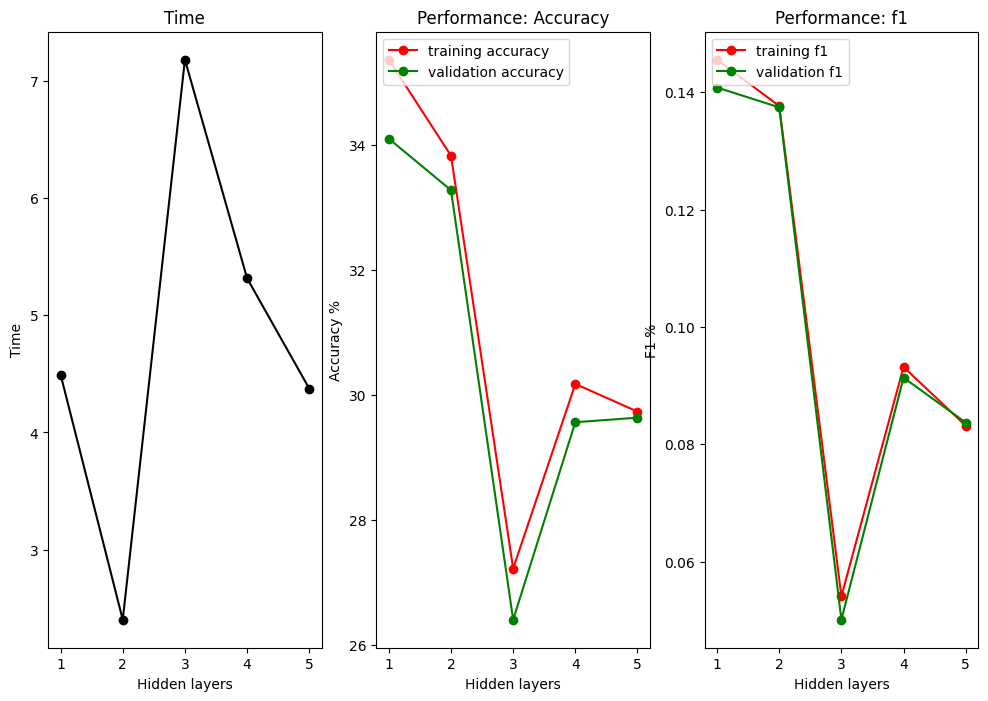

In [19]:
loss_fn = nn.CrossEntropyLoss()

time_efficency(batch_size = 256, n_epochs = 1, lr = 0.01)

# 1.5 - Evaluation
You should report the following performance metrics on the development (vali- dation) set for each of your models:

1. accuracy;
2. precision, recall and macro-F1 score.

You can calculate these scores using either PyTorch, HuggingFace Evaluate, scikit-learn, or any other mainstream machine learning library.
Describe the differences in your systems’ performance in the PDF report. Give your opinion on the influence of different hyper-parameter values. Finally, choose your best-performing system and publish it in your UiO Github repository as a saved PyTorch model.
Recall that non-linear models sometimes can produce different results with the
5 same hyperparameters because of different random initializations. Thus, train your best model 3 times and evaluate it 3 times, providing the average and the standard deviation.
What are the results? Are they worse or better than on the train data? Why? Report the results in the PDF and in a machine-readable format in the repository.

You also have to provide an eval_on_test.py script. It should take as an input a path to a saved model and a test dataset (presume it is in the same format as the training dataset), and return accuracy, precision, recall, and F1 scores for each class in the test set, as well as their macro averaged values. We will use this script to evaluate your classifier on the held-out test set. If the eval script fails to execute correctly without us having to modify your code, we will deduct 1 point from your submission. Please also give your model files meaningful names.

### General evaluation


In [20]:
# evaluation function take input x_val, y_val, a model, nothing special
# info is like verbose again

def evaluation(x_val, y_val, model, info = True):
    # need to see what to do for y_pred, depends on our model
    # do we need logits first, squeeze, etc?
    y_pred = model(x_val)
    _, predictions = torch.max(y_pred, 1)
    y_truth = y_val

    accuracy = metrics.accuracy_score(predictions, y_truth)
    
    recall = metrics.recall_score(predictions, y_truth, average = "macro")
    
    precision = metrics.precision_score(predictions, y_truth, average = "macro")
    
    f1 = metrics.f1_score(predictions, y_truth, average = "macro")
    
    if info:
        print(f"model evaluation:\nAccuracy: {accuracy:.3f} \nRecall: {recall:.3f} \nPrecision: {precision:.3f} \nf1-macro: {f1:.3f}")
    
    return accuracy, recall, precision, f1


In [21]:
accuracy, recall, precision, f1 = evaluation(x_val, y_val, trained_model)

model evaluation:
Accuracy: 0.561 
Recall: 0.492 
Precision: 0.469 
f1-macro: 0.479


### Best evaluation

In [48]:
# best_model_eval takes a lot of input, nothing special
# classifier input is a model, but untrained
# train the model 3 times and evaluate it
# output is the mean and std of metrics

def best_model_eval(train_dataloader,
                    val_dataloader,
                    classifier,
                    batch_size: int,
                    n_epochs: int,
                    lr: float,
                    n_train_and_eval = 3):
    
    acc_list = []
    recall_list = []
    prec_list = []
    f1_list = []
    
    for i in range(n_train_and_eval):
        
        print("...")
        
        model = classifier
    
        loss_fn = nn.CrossEntropyLoss()

        optimizer = torch.optim.SGD(params = model.parameters(),
                                    lr = lr)
        
        # train function here
        model.train()
        model_train = train(train_dataloader, val_dataloader, model, batch_size , n_epochs, lr, info = False)

        accuracy, recall, precision, f1 = evaluation(x_val, y_val, model_train, info = False)
        
        acc_list.append(accuracy)
        recall_list.append(recall)
        prec_list.append(precision)
        f1_list.append(f1)
        
        print(f"Run {i + 1} done")
        
    acc_mean = np.mean(acc_list)
    acc_sd = np.std(acc_list)
    
    recall_mean = np.mean(recall_list)
    recall_sd = np.std(recall_list)
    
    prec_mean = np.mean(prec_list)
    prec_sd = np.std(prec_list)
    
    f1_mean = np.mean(f1_list)
    f1_sd = np.std(f1_list)
    
    print(f"Evaluation on our best model over {n_train_and_eval} runs:")
    print("------------------------------------------------------")
    print(f"Accuracy: {acc_list}")
    print(f"Accuracy mean: {acc_mean:.3f}%, with sd: {acc_sd:.3f}")
    print("------------------------------------------------------")
    print(f"Accuracy: {recall_list}")
    print(f"Recall mean: {recall_mean:.3f}, with sd: {recall_sd:.3f}")
    print("------------------------------------------------------")
    print(f"Precision: {prec_list}")
    print(f"Precision mean: {prec_mean:.3f}, with sd: {prec_sd:.3f}")
    print("------------------------------------------------------")
    print(f"F1: {f1_list}")
    print(f"F1-macro mean: {f1_mean:.3f}, with sd: {f1_sd:.3f}")

    return   


In [50]:
best_classifier = FeedForwardNN(input_size = len(x_train[1]),
                                hidden_size = 2,
                                hidden_layers = 1,
                                num_classes = len(y_train)
                                )
batch_size = 32
n_epochs = 1
lr = 0.1

best_model_eval(train_dataset, val_dataset, best_classifier, batch_size, n_epochs, lr)
  

...
run: 0
acc = 28.329%

test acc = 28.676%


Run 1 done
...
run: 0
acc = 33.378%

test acc = 31.603%


Run 2 done
...
run: 0
acc = 35.033%

test acc = 31.504%


Run 3 done
Evaluation on our best model over 3 runs:
------------------------------------------------------
Accuracy: [0.2867598137059215, 0.31603459747172324, 0.31503659347970725]
Accuracy mean: 0.306%, with sd: 0.014
------------------------------------------------------
Accuracy: [0.197098066676145, 0.1306629096366066, 0.14890640558927987]
Recall mean: 0.159, with sd: 0.028
------------------------------------------------------
Precision: [0.1483389993919891, 0.19134555004885112, 0.1874481801191889]
Precision mean: 0.176, with sd: 0.019
------------------------------------------------------
F1: [0.11642299717159432, 0.14249893956636575, 0.1449206776117141]
F1-macro mean: 0.135, with sd: 0.013
